#### 1. Complete Case Analysis 
#### 2. Simple Imputer 
#### 3. Missing Indictaor 




#### 1. Complete Case Analysis 

Complete Case Analysis (CCA), also known as listwise deletion, is a method used to handle missing data by excluding observations with missing values on any variable involved in the analysis.

Assumptions:
##### Not applicable for data missing with set of rows (first few rows, or middle few rows, first or last few rows)
##### Applicable When percentage of missing values are less
##### When removing rows have no much information loss with respect to other columns

Benifit- 
        1. Distribution of data remains same

#### 2. Simple Imputer 

Simple Imputer handles missing values by replacing them with a specified constant or the mean, median, or most frequent value along each column.

#### 1.1 Univariate Imputation 
##### Numeric - 
                1. Mean Median Mode
                2. Arbitary
                3. End of Distribution
                4. Random Sample Imputation( Works for Categorical Data as well)
##### Coatgeorical- 
                1. Most_frequent
                2. Missing

#### 1.2 Multivariate Imputation
                1. KNN Imputer
                2. Iterative Imputer



### 1. Mean Median
#### Mean suited when data is normally distributed
#### Mdeian Suited when data is skewed

      Best Suited
            1. When less than 5% data is missing
      Problems
            2. Changes the shape of distribution
            3. Outliers may be generated
            4. There may be change in covariane/ Correlation


### 2. Arbitrary Imputation
Arbitrary imputation is a method of handling missing data where missing values are replaced with arbitrary or predetermined values. Unlike other imputation methods that use statistical measures such as mean, median, or mode, arbitrary imputation involves replacing missing values with values that are chosen based on domain knowledge or specific considerations related to the dataset. Ex: Age can be replace with 99,-1,0...

      Best Suited
            1. When data is not missing at random
      Problems
            1. Distribtuion may change
            2. Variance & Covariance may change

###### Arbitrary values to fill missing values
        
arbitrary_values = {'A': -999, 'B': 999, 'C': 0
        on
for column, value in arbitrary_values.items        ():
    df[column].fillna(value, inplace=True)



### 3. End of Distributuon 
Handling missing values by using the end of the distribution involves replacing missing values with extreme values from the distribution of the variable. This method is often employed when missingness is not at random (MNAR) and there's a reason to believe that missing values are related to the distribution of the variable.

      Best Suited
            1. When data is not missing at random
      Problems
            1. Distribtuion may change
            2.Variance & may change

###
#### for column in df.columns:        
    # Replace missing values at the high end with the maximum value    
    df[column].fillna(df[column].max(), inplace=True        )
    # Replace missing values at the low end with the minimum val        ue
    # df[column].fillna(df[column].min(), inplace=True)  # Uncomment if applicable

print(df)nt(df)

### 4. Random Sample Imputation
Random sample imputation involves replacing missing values with random samples drawn from the observed values of the variable. This method preserves the statistical properties of the variable and can help to maintain the original distribution of the data.
     
      Best Suited
            1. Data Distribution Does not change
            2. Variane & covariance does not change
            3. Works best for linear models
            4. Works for both numerical and categorical data
      Problems
            1. Does not suit for tree based algorithms
            2. Uses a lot of memory to generate random numbers as its based on training


#### 
            def random_sampling_imputation(column):                
    # Extract non-missing values            
    non_missing_values = df[column].dropna(                )
    # Generate random samples with replaceme            nt
    random_samples = np.random.choice(non_missing_values, size=df[column].isnull().sum(), replace=Tr                ue)
    # Replace missing values with random sam            ples
    df.loc[df[column].isnull(), column] = random_sam        es

# Apply random sampling imputation to each column with missing         values
for column in df.        columns:
    if df[column].isnull().s            um() > 0:
        random_sampling_imputation(column)

## 1. Complete Case analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [3]:
df = pd.read_csv('Missing_Data.csv')
df.drop('airconditioning',axis=1,inplace=True)
df.head()
dff=df.copy()

In [4]:
#df.isnull().sum()
df.isnull().mean()*100

area        0.733945
bedrooms    3.486239
parking     5.504587
price       0.000000
dtype: float64

In [5]:
df

,area,bedrooms,parking,price
0,7420.0,NaN,2.0,13300000
1,8960.0,NaN,3.0,12250000
2,9960.0,NaN,2.0,12250000
3,7500.0,NaN,3.0,12215000
4,7420.0,NaN,2.0,11410000
...,...,...,...,...
540,3000.0,2.0,2.0,1820000
541,2400.0,3.0,0.0,1767150
542,3620.0,2.0,0.0,1750000
543,2910.0,3.0,0.0,1750000


In [6]:
l=[col for col in df.columns if df[col].isnull().mean() <0.05 and df[col].isnull().mean()>0]
l

['area', 'bedrooms']

In [7]:
df.dropna(subset = l[0], inplace=True)

In [8]:
df['bedrooms'].fillna(df['bedrooms'].mean(),inplace=True)
df['parking'].fillna(df['parking'].mean(),inplace=True)

In [9]:
df

,area,bedrooms,parking,price
0,7420.0,2.936902,2.0,13300000
1,8960.0,2.936902,3.0,12250000
2,9960.0,2.936902,2.0,12250000
3,7500.0,2.936902,3.0,12215000
4,7420.0,2.936902,2.0,11410000
...,...,...,...,...
540,3000.0,2.000000,2.0,1820000
541,2400.0,3.000000,0.0,1767150
542,3620.0,2.000000,0.0,1750000
543,2910.0,3.000000,0.0,1750000


In [10]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [13]:
y_pred = model.predict(X_test)

print('MAE', mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))
print('R2 Score', r2_score(y_test,y_pred))

MAE 1208945.2680042163
MSE 2708764207918.7896
R2 Score 0.3064242922699877


In [14]:
# df.shape, df2.shape

## Simple Imputer

In [15]:
df = pd.read_csv('Missing_Data.csv')
df.drop('airconditioning',axis=1,inplace=True)
df.head()
dff=df.copy()

Text(0.5, 1.0, 'Area')

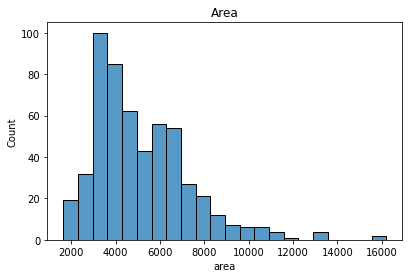

In [16]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['area'])
plt.title('Area')



In [17]:
#df.fillna(df.mean(),inplace=True)

In [22]:
imp1=SimpleImputer(strategy="median")
imp2=SimpleImputer(strategy="most_frequent")

Text(0.5, 1.0, 'Area')

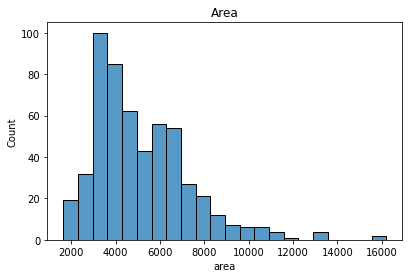

In [23]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['area'])
plt.title('Area')



In [20]:
tr=ColumnTransformer([
                    ('Median',imp1,['area']),
                    ('Mode1',imp2,['bedrooms']),
                    ('Mode2',imp2,['parking'])],
                     remainder='passthrough')

In [21]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [20]:
tr.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Median', SimpleImputer(strategy='median'),
                                 ['area']),
                                ('Mode1',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['bedrooms']),
                                ('Mode2',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['parking'])])

In [21]:
X=tr.fit_transform(X)
X

array([[7.42e+03, 3.00e+00, 2.00e+00],
       [8.96e+03, 3.00e+00, 3.00e+00],
       [9.96e+03, 3.00e+00, 2.00e+00],
       ...,
       [3.62e+03, 2.00e+00, 0.00e+00],
       [2.91e+03, 3.00e+00, 0.00e+00],
       [3.85e+03, 3.00e+00, 0.00e+00]])

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [23]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred = model.predict(X_test)

print('MAE', mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))
print('R2 Score', r2_score(y_test,y_pred))
# print("Coeeficients",model.coef_)
# print("Intercept",model.intercept_)
# residual = y_test - y_pred

MAE 1177516.9639840694
MSE 2677129316536.3584
R2 Score 0.342299150103331


# Missing Indicator

### 
A missing indicator is a binary variable that indicates whether a value in a dataset is missing or not. It is useful for capturing the patterns and information related to missing values in your dataset

In [32]:
df = pd.read_csv('Missing_Data.csv')
df.drop('airconditioning',axis=1,inplace=True)
df.head()
dff=df.copy()

In [33]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]
X

,area,bedrooms,parking
0,7420.0,NaN,2.0
1,8960.0,NaN,3.0
2,9960.0,NaN,2.0
3,7500.0,NaN,3.0
4,7420.0,NaN,2.0
...,...,...,...
540,3000.0,2.0,2.0
541,2400.0,3.0,0.0
542,3620.0,2.0,0.0
543,2910.0,3.0,0.0


In [34]:
imp=SimpleImputer(add_indicator=True)
imp.fit(X)
X= imp.transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4,5
0,7420.0,2.939163,2.0,0.0,1.0,0.0
1,8960.0,2.939163,3.0,0.0,1.0,0.0
2,9960.0,2.939163,2.0,0.0,1.0,0.0
3,7500.0,2.939163,3.0,0.0,1.0,0.0
4,7420.0,2.939163,2.0,0.0,1.0,0.0
...,...,...,...,...,...,...
540,3000.0,2.000000,2.0,0.0,0.0,0.0
541,2400.0,3.000000,0.0,0.0,0.0,0.0
542,3620.0,2.000000,0.0,0.0,0.0,0.0
543,2910.0,3.000000,0.0,0.0,0.0,0.0


In [35]:
X=X.iloc[:,3:6]
X

,3,4,5
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
540,0.0,0.0,0.0
541,0.0,0.0,0.0
542,0.0,0.0,0.0
543,0.0,0.0,0.0


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [30]:
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

print('MAE', mean_absolute_error(y_test,y_pred))
print('MSE', mean_squared_error(y_test,y_pred))
print('R2 Score', r2_score(y_test,y_pred))

MAE 1214109.7496634293
MSE 2112515150327.7534
R2 Score 0.4810101248348556
